In [1]:
import pandas as pd
import geopandas as gpd
from tabulate import tabulate
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data=gpd.read_file("../../20_intermediate_files/30_campuses_w_dist_to_nearest_pp.geojson")

In [3]:
data = data[['UNIQUEID', 'NAME', 'STATE', 'COUNTY', 'Institution Type', 
       'MSI', 'Latitude_2020', 'Longitude_2020','distances_2020', 'distances_2020_early', 'Region',
       'POPPCT_URBAN','POPPCT_RURAL', '2020_early_distance_by_walking (miles)',
       '2020_distance_by_walking (miles)', 'geometry']]

In [4]:
#We need to make sure we don't have missing values for 2020 distances or 2020_early distances
#Check if True
data['UNIQUEID'].count() == data['distances_2020'].count() == data['distances_2020_early'].count()

True

In [5]:
data.MSI.value_counts()

                      1274
HSI                    194
HBCU                    70
PBI                     57
AANAPISI & HSI          56
AANAPISI                37
NASNTI                  14
TCU                      6
ANNH & NASNTI            5
ANNH & TCU               3
HSI & PBI                3
HSI & NASNTI             1
ANNH, HSI & NASNTI       1
AANAPISI & PBI           1
Name: MSI, dtype: int64

### What percentage of schools across all 50 states have on-campus ED polling places? Have early voting sites? (It would be helpful to see this in 3 ways: % with ED site, % with EV, combined with % with on-campus voting options generally)

In [6]:
ed_count = data[data['distances_2020']==0]['UNIQUEID'].count()
ev_count = data[data['distances_2020_early']==0]['UNIQUEID'].count()
combo_count = data[(data['distances_2020']==0) | (data['distances_2020_early']==0)]['UNIQUEID'].count()
college_count = data['UNIQUEID'].count()

In [7]:
table = [['Percentage of Schools With On-Campus Election Day Polling Places', str(np.round(100*ed_count/college_count,2)) + '%'],
         ['Percentage of Schools With On-Campus Early Voting Sites', str(np.round(100*ev_count/college_count,2)) + '%'],
         ['Percentage of Schools With On-Campus Voting Options (Any)', str(np.round(100*combo_count/college_count,2)) + '%']]

In [8]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════════════════════════════════════════════════════════╤══════════╕
│ Percentage of Schools With On-Campus Election Day Polling Places   │ 24.26%   │
╞════════════════════════════════════════════════════════════════════╪══════════╡
│ Percentage of Schools With On-Campus Early Voting Sites            │ 9.0%     │
├────────────────────────────────────────────────────────────────────┼──────────┤
│ Percentage of Schools With On-Campus Voting Options (Any)          │ 25.89%   │
╘════════════════════════════════════════════════════════════════════╧══════════╛


### What percentage of schools are more than 1 mile from their nearest voting site? (Similar to above, 3 numbers: EV, ED, combined.)

In [9]:
ed_count_1 = data[data['2020_distance_by_walking (miles)'] > 1]['UNIQUEID'].count()
ev_count_1 = data[data['2020_early_distance_by_walking (miles)'] > 1]['UNIQUEID'].count()
combo_count_1 = data[(data['2020_distance_by_walking (miles)'] > 1) & (data['2020_early_distance_by_walking (miles)'] > 1)]['UNIQUEID'].count()

In [10]:
table = [['Percentage of Schools With Nearest Election Day Polling Place More Than 1 Mile Away From Center', str(np.round(100*ed_count_1/college_count,2)) + '%'],
         ['Percentage of Schools With Nearest Early Voting Site More Than 1 Mile Away From Center', str(np.round(100*ev_count_1/college_count,2)) + '%'],
         ['Percentage of Schools With Nearest Voting Option (Any) More Than 1 Mile Away From Center', str(np.round(100*combo_count_1/college_count,2)) + '%']]

In [11]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════════════════════════════════════════════════════════════════════════════════════╤══════════╕
│ Percentage of Schools With Nearest Election Day Polling Place More Than 1 Mile Away From Center   │ 41.32%   │
╞═══════════════════════════════════════════════════════════════════════════════════════════════════╪══════════╡
│ Percentage of Schools With Nearest Early Voting Site More Than 1 Mile Away From Center            │ 76.32%   │
├───────────────────────────────────────────────────────────────────────────────────────────────────┼──────────┤
│ Percentage of Schools With Nearest Voting Option (Any) More Than 1 Mile Away From Center          │ 38.83%   │
╘═══════════════════════════════════════════════════════════════════════════════════════════════════╧══════════╛


In [12]:
ed_count_1 = data[data['distances_2020'] > 1]['UNIQUEID'].count()
ev_count_1 = data[data['distances_2020_early'] > 1]['UNIQUEID'].count()
combo_count_1 = data[(data['distances_2020'] > 1) & (data['distances_2020_early'] > 1)]['UNIQUEID'].count()
table = [['Percentage of Schools With Nearest Election Day Polling Place More Than 1 Mile Away From Campus', str(np.round(100*ed_count_1/college_count,2)) + '%'],
         ['Percentage of Schools With Nearest Early Voting Site More Than 1 Mile Away From Campus', str(np.round(100*ev_count_1/college_count,2)) + '%'],
         ['Percentage of Schools With Nearest Voting Option (Any) More Than 1 Mile Away From Campus', str(np.round(100*combo_count_1/college_count,2)) + '%']]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════════════════════════════════════════════════════════════════════════════════════╤══════════╕
│ Percentage of Schools With Nearest Election Day Polling Place More Than 1 Mile Away From Campus   │ 75.62%   │
╞═══════════════════════════════════════════════════════════════════════════════════════════════════╪══════════╡
│ Percentage of Schools With Nearest Early Voting Site More Than 1 Mile Away From Campus            │ 91.0%    │
├───────────────────────────────────────────────────────────────────────────────────────────────────┼──────────┤
│ Percentage of Schools With Nearest Voting Option (Any) More Than 1 Mile Away From Campus          │ 74.0%    │
╘═══════════════════════════════════════════════════════════════════════════════════════════════════╧══════════╛


### Of the polling sites that exist on campuses, what percentage are on PWIs vs. MSIs?

In [13]:
# Re-Label MSI's

data = data.replace({'MSI': {'HBCU': 'HBCU/PBI', 'PBI': 'HBCU/PBI', 'AANAPISI & HSI': 'Other', 
                      'AANAPISI': 'Other', 'ANNH & NASNTI': 'Other', 'ANNH': 'Other',
                   'NASNTI': 'Other', 'HSI & PBI': 'Other', 'TCU': 'Other', 'ANNH & TCU':'Other', ' ': 'PWI',
                    'HSI & NASNTI': 'Other', 'ANNH, HSI & NASNTI': "Other", 'AANAPISI & PBI': 'Other'}})

In [14]:

data['MSI'].value_counts()

PWI         1274
HSI          194
Other        127
HBCU/PBI     127
Name: MSI, dtype: int64

In [15]:
### Classify Urban or Rural

data['urb_rur'] =  data['POPPCT_URBAN'] > data['POPPCT_RURAL']
data['urb_rur'] = data['urb_rur'].replace(True, 'URBAN')
data['urb_rur'] = data['urb_rur'].replace(False, 'RURAL')

In [16]:
data_pwi = data[data['MSI'] == 'PWI']
data_hbcu = data[data['MSI'] == 'HBCU/PBI']
data_hsi = data[data['MSI'] == 'HSI']
data_other = data[data['MSI'] == 'Other']

In [17]:
def msi_table(df):
    urb_count = df[(df['urb_rur'] == 'URBAN') & ((df['distances_2020']==0) | (df['distances_2020_early']==0))]['UNIQUEID'].count()
    rur_count = df[(df['urb_rur'] == 'RURAL') & ((df['distances_2020']==0) | (df['distances_2020_early']==0))]['UNIQUEID'].count()
    combo_count = df[(df['distances_2020']==0) | (df['distances_2020_early']==0)]['UNIQUEID'].count()
    college_count = df['UNIQUEID'].count()
    urban_count = df[df['urb_rur'] == 'URBAN']['UNIQUEID'].count()
    rural_count = df[df['urb_rur'] == 'RURAL']['UNIQUEID'].count()
    table = [['{} Statistics'.format(df['MSI'].iloc[0]),' '],
        ['Percentage of Urban Schools With On-Campus Voting Options (Any)', str(np.round(100*urb_count/urban_count,2)) + '%'],
         ['Percentage of Rural Schools With On-Campus Voting Options (Any)', str(np.round(100*rur_count/rural_count,2)) + '%'],
         ['Percentage of Schools With On-Campus Voting Options (Any)', str(np.round(100*combo_count/college_count,2)) + '%']]
    return tabulate(table, headers='firstrow', tablefmt='fancy_grid')

In [18]:
print(msi_table(data_pwi))

╒═════════════════════════════════════════════════════════════════╤════════╕
│ PWI Statistics                                                  │        │
╞═════════════════════════════════════════════════════════════════╪════════╡
│ Percentage of Urban Schools With On-Campus Voting Options (Any) │ 24.66% │
├─────────────────────────────────────────────────────────────────┼────────┤
│ Percentage of Rural Schools With On-Campus Voting Options (Any) │ 15.41% │
├─────────────────────────────────────────────────────────────────┼────────┤
│ Percentage of Schools With On-Campus Voting Options (Any)       │ 22.45% │
╘═════════════════════════════════════════════════════════════════╧════════╛


In [19]:
print(msi_table(data_hbcu))

╒═════════════════════════════════════════════════════════════════╤════════╕
│ HBCU/PBI Statistics                                             │        │
╞═════════════════════════════════════════════════════════════════╪════════╡
│ Percentage of Urban Schools With On-Campus Voting Options (Any) │ 30.93% │
├─────────────────────────────────────────────────────────────────┼────────┤
│ Percentage of Rural Schools With On-Campus Voting Options (Any) │ 30.0%  │
├─────────────────────────────────────────────────────────────────┼────────┤
│ Percentage of Schools With On-Campus Voting Options (Any)       │ 30.71% │
╘═════════════════════════════════════════════════════════════════╧════════╛


In [20]:
print(msi_table(data_hsi))

╒═════════════════════════════════════════════════════════════════╤════════╕
│ HSI Statistics                                                  │        │
╞═════════════════════════════════════════════════════════════════╪════════╡
│ Percentage of Urban Schools With On-Campus Voting Options (Any) │ 39.04% │
├─────────────────────────────────────────────────────────────────┼────────┤
│ Percentage of Rural Schools With On-Campus Voting Options (Any) │ 42.86% │
├─────────────────────────────────────────────────────────────────┼────────┤
│ Percentage of Schools With On-Campus Voting Options (Any)       │ 39.18% │
╘═════════════════════════════════════════════════════════════════╧════════╛


In [21]:
print(msi_table(data_other))

╒═════════════════════════════════════════════════════════════════╤════════╕
│ Other Statistics                                                │        │
╞═════════════════════════════════════════════════════════════════╪════════╡
│ Percentage of Urban Schools With On-Campus Voting Options (Any) │ 39.45% │
├─────────────────────────────────────────────────────────────────┼────────┤
│ Percentage of Rural Schools With On-Campus Voting Options (Any) │ 11.11% │
├─────────────────────────────────────────────────────────────────┼────────┤
│ Percentage of Schools With On-Campus Voting Options (Any)       │ 35.43% │
╘═════════════════════════════════════════════════════════════════╧════════╛


### What percentage of schools in GA, NC, TX, and FL respectively have early voting options on campus? How does this compare to other states in the country? i.e. do they have fewer schools with early voting options, about the same, or more?

In [22]:
state_df = pd.DataFrame(data.groupby(['STATE','Region'])['distances_2020_early'].count())

In [23]:
state_df = state_df.reset_index()

In [24]:
state_df_early = pd.DataFrame(data[data['distances_2020_early']==0].groupby(['STATE'])['distances_2020_early'].count())

In [25]:
early_by_state = state_df.merge(state_df_early, on=['STATE'], how='outer')
early_by_state = early_by_state.fillna(value=0)
early_by_state.columns=['STATE','Region','total_schools_ev','on_campus_ev']
early_by_state['pct'] = early_by_state['on_campus_ev']/early_by_state['total_schools_ev']
#Handle NA's from dividing by 0
early_by_state = early_by_state.fillna(value=0)
early_by_state['pct'] = np.round(100*early_by_state['pct'],2)
early_by_state = early_by_state.sort_values(by=['pct'])

In [26]:
states = ['GA','NC','TX','FL']

In [27]:
early_by_state[early_by_state['STATE'].isin(states)]

,STATE,Region,total_schools_ev,on_campus_ev,pct
4,GA,South,75,5.0,6.67
3,FL,South,66,9.0,13.64
14,NC,South,104,16.0,15.38
25,TX,South,134,33.0,24.63


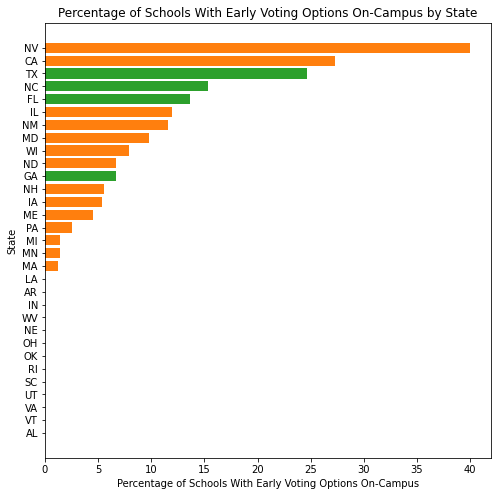

In [28]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(8)
c = ['C2' if i in states else 'C1' for i in early_by_state['STATE']]
ax.barh(y=early_by_state.STATE,width=early_by_state.pct,color=c)
ax.set_title('Percentage of Schools With Early Voting Options On-Campus by State')
ax.set_xlabel('Percentage of Schools With Early Voting Options On-Campus')
ax.set_ylabel('State')
ax.grid(False)
fig.savefig('states.png')

### Is there a case to be made for why GA, NC, TX, and FL are the states where we should focus our efforts in 2022? How do the distances to polling places for schools in these states compare to other states in the region? In the country?

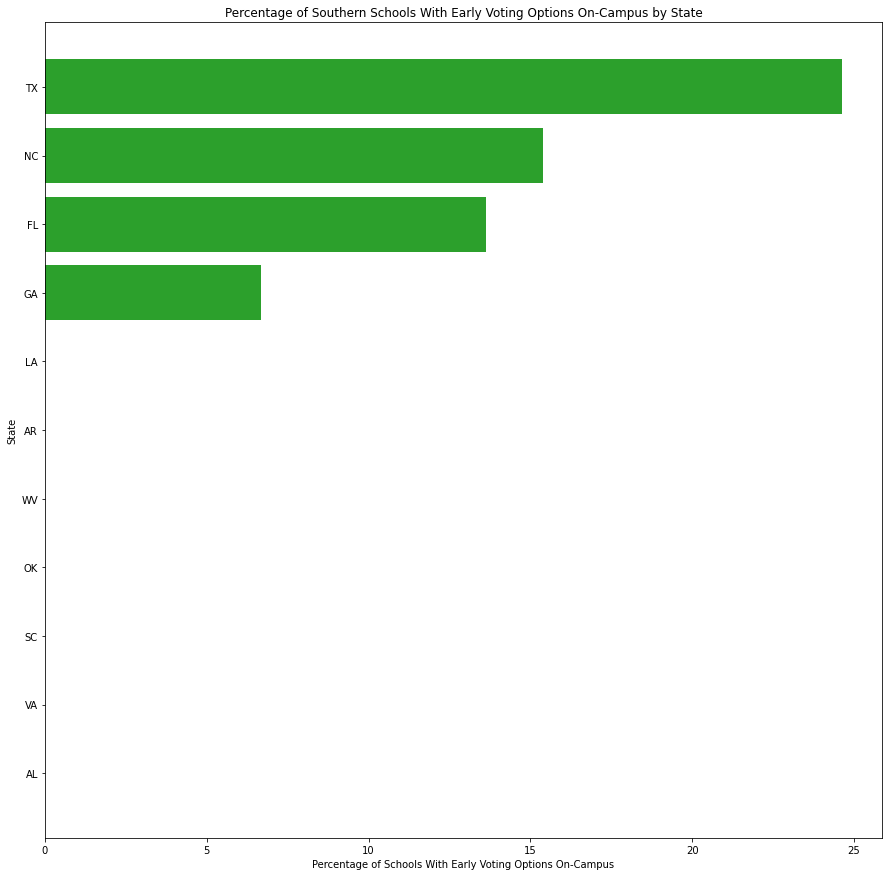

In [29]:
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
df = early_by_state[early_by_state['Region']=='South']
c = ['C2' if i in states else 'C1' for i in df['STATE']]
ax.barh(y=df['STATE'],width=df.pct,color=c)
ax.set_title('Percentage of Southern Schools With Early Voting Options On-Campus by State')
ax.set_xlabel('Percentage of Schools With Early Voting Options On-Campus')
ax.set_ylabel('State')
ax.grid(False)

In [30]:
early_by_state['Region'].unique()

array(['South', 'North East', 'West', 'Mid West'], dtype=object)

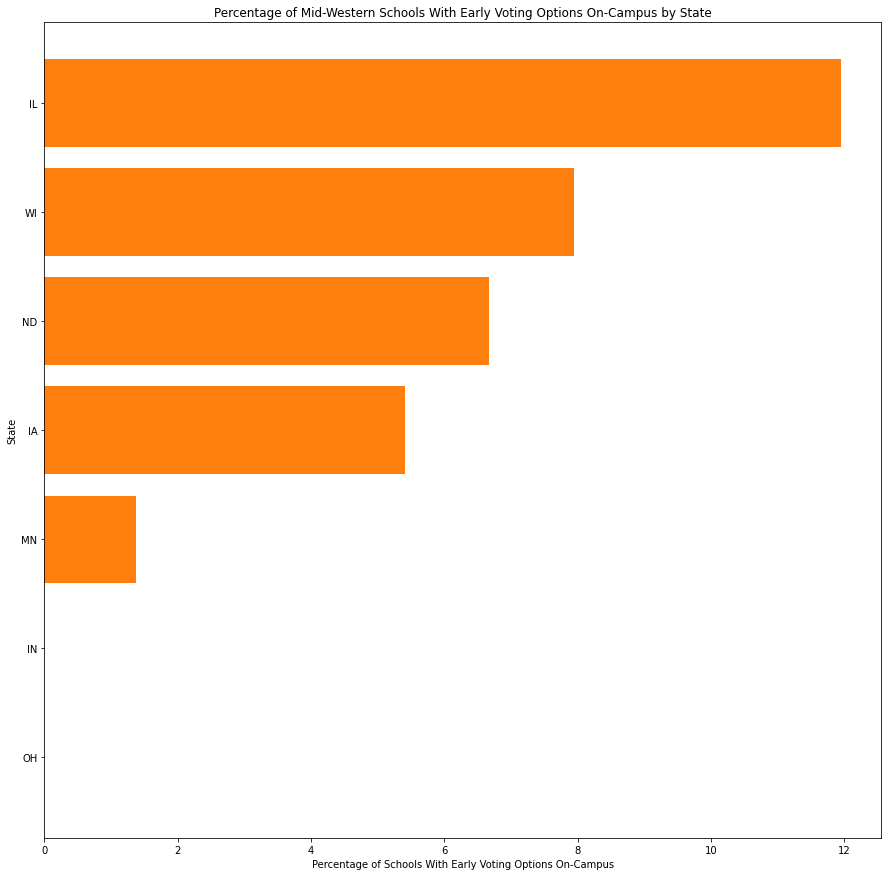

In [31]:
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
df = early_by_state[early_by_state['Region']=='Mid West']
c = ['C2' if i in states else 'C1' for i in df['STATE']]
ax.barh(y=df['STATE'],width=df.pct,color=c)
ax.set_title('Percentage of Mid-Western Schools With Early Voting Options On-Campus by State')
ax.set_xlabel('Percentage of Schools With Early Voting Options On-Campus')
ax.set_ylabel('State')
ax.grid(False)

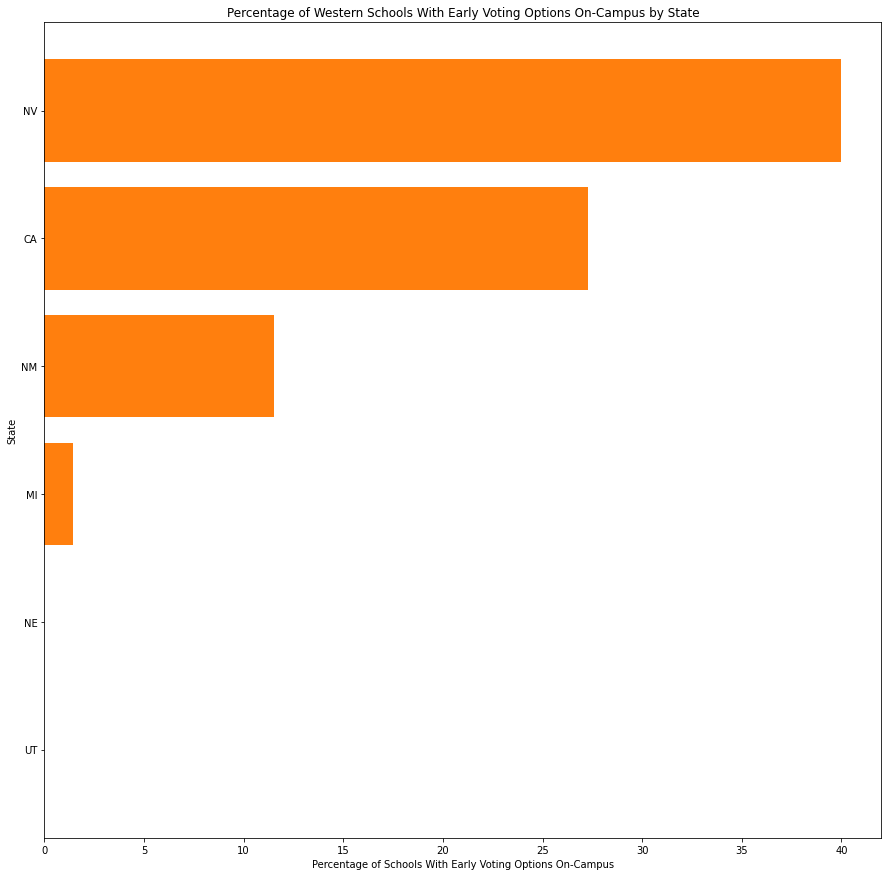

In [32]:
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
df = early_by_state[early_by_state['Region']=='West']
c = ['C2' if i in states else 'C1' for i in df['STATE']]
ax.barh(y=df['STATE'],width=df.pct,color=c)
ax.set_title('Percentage of Western Schools With Early Voting Options On-Campus by State')
ax.set_xlabel('Percentage of Schools With Early Voting Options On-Campus')
ax.set_ylabel('State')
ax.grid(False)

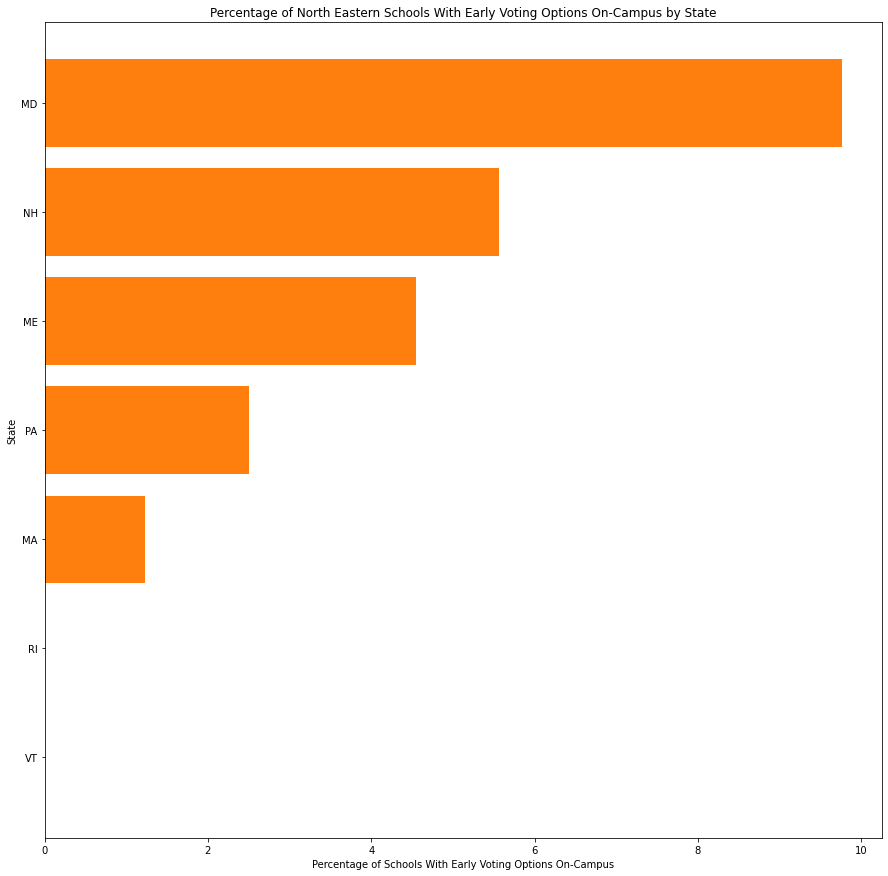

In [33]:
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
df = early_by_state[early_by_state['Region']=='North East']
c = ['C2' if i in states else 'C1' for i in df['STATE']]
ax.barh(y=df['STATE'],width=df.pct,color=c)
ax.set_title('Percentage of North Eastern Schools With Early Voting Options On-Campus by State')
ax.set_xlabel('Percentage of Schools With Early Voting Options On-Campus')
ax.set_ylabel('State')
ax.grid(False)

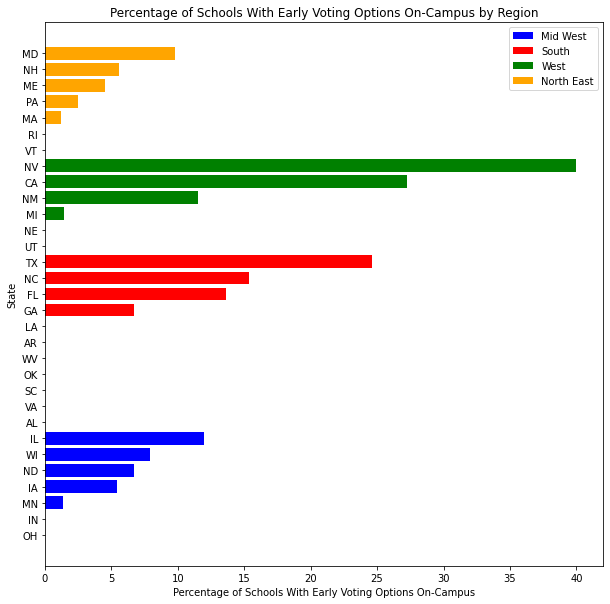

In [34]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
df = early_by_state
dfS = df[df['Region'] == 'South']
dfMW = df[df['Region'] == 'Mid West']
dfNE = df[df['Region'] == 'North East']
dfW = df[df['Region'] == 'West']
ax.barh(y=dfMW['STATE'],width=dfMW.pct,color="blue", label= 'Mid West')
ax.barh(y=dfS['STATE'],width=dfS.pct,color="red", label = 'South')
ax.barh(y=dfW['STATE'],width=dfW.pct,color="green", label = 'West')
ax.barh(y=dfNE['STATE'],width=dfNE.pct,color="orange", label = 'North East')
ax.set_title('Percentage of Schools With Early Voting Options On-Campus by Region')
ax.set_xlabel('Percentage of Schools With Early Voting Options On-Campus')
ax.set_ylabel('State')
ax.legend()
ax.grid(False)
fig.savefig('regions.png')

In [35]:
#Mean/Median Distance By State (Urban/Rural)

<AxesSubplot:title={'center':'2020 Early Voting Median Distances By Region'}, xlabel='Region'>

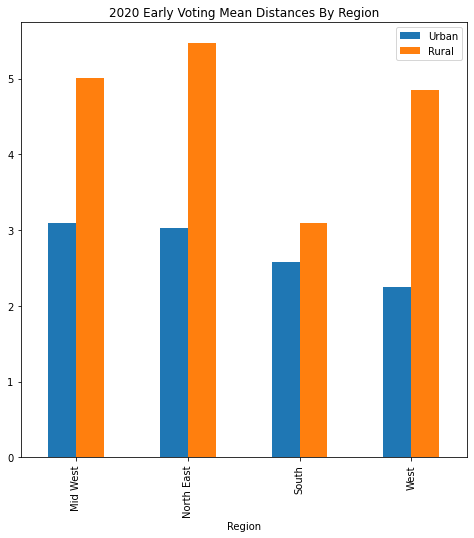

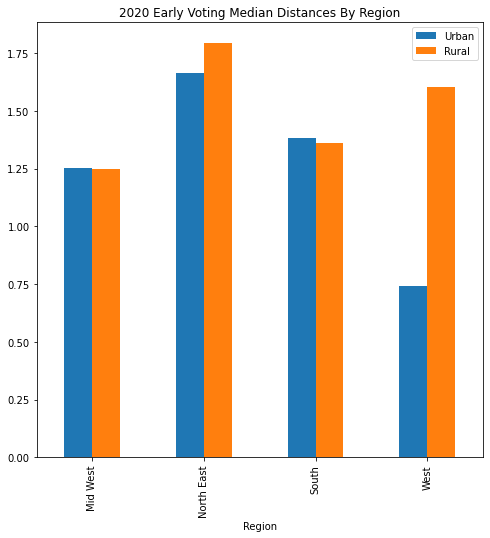

In [36]:
dfu = data[data['urb_rur'] == 'URBAN'][["distances_2020_early","Region"]].groupby('Region').mean()/1609
dfr = data[data['urb_rur'] == 'RURAL'][["distances_2020_early","Region"]].groupby('Region').mean()/1609
df = pd.merge(dfu,dfr, on='Region')
df.columns = ['Urban','Rural']
df.plot.bar(title='2020 Early Voting Mean Distances By Region',figsize=(8,8))

dfu = data[data['urb_rur'] == 'URBAN'][["distances_2020_early","Region"]].groupby('Region').median()/1609
dfr = data[data['urb_rur'] == 'RURAL'][["distances_2020_early","Region"]].groupby('Region').median()/1609
df = pd.merge(dfu,dfr, on='Region')
df.columns = ['Urban','Rural']
df.plot.bar(title='2020 Early Voting Median Distances By Region',figsize=(8,8))

In [37]:
#Mean/Median Distance by MSI Urban/Rural

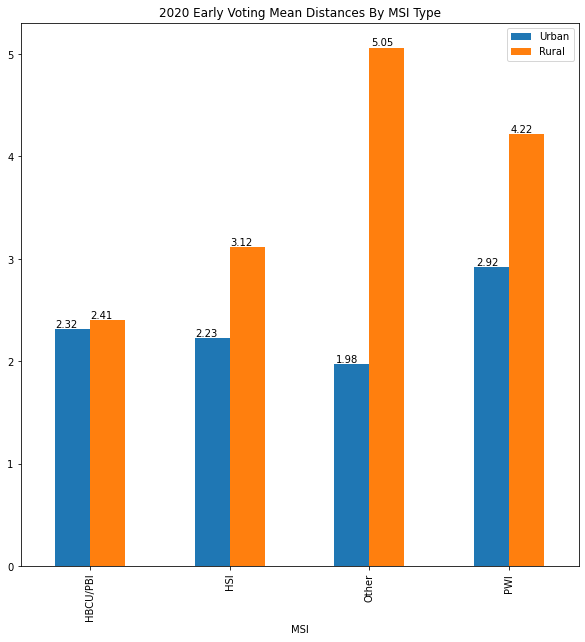

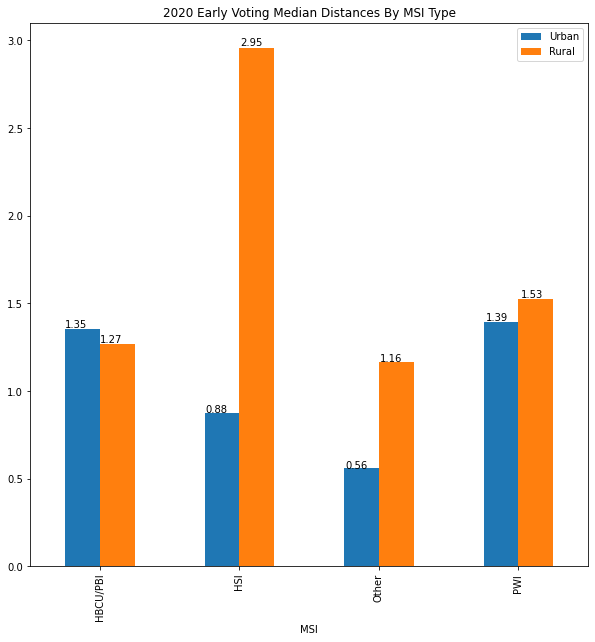

In [38]:
dfu = data[data['urb_rur'] == 'URBAN'][["distances_2020_early","MSI"]].groupby('MSI').mean()/1609
dfr = data[data['urb_rur'] == 'RURAL'][["distances_2020_early","MSI"]].groupby('MSI').mean()/1609
df = pd.merge(dfu,dfr, on='MSI')
df.columns = ['Urban','Rural']
ax = df.plot.bar(title='2020 Early Voting Mean Distances By MSI Type',figsize=(10,10))
for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

dfu = data[data['urb_rur'] == 'URBAN'][["distances_2020_early","MSI"]].groupby('MSI').median()/1609
dfr = data[data['urb_rur'] == 'RURAL'][["distances_2020_early","MSI"]].groupby('MSI').median()/1609
df = pd.merge(dfu,dfr, on='MSI')
df.columns = ['Urban','Rural']
ax2 = df.plot.bar(title='2020 Early Voting Median Distances By MSI Type',figsize=(10,10))
for p in ax2.patches:
    ax2.annotate(str(np.round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

In [39]:
#Mean/Median distance by type (2/4 Pub/Priv)

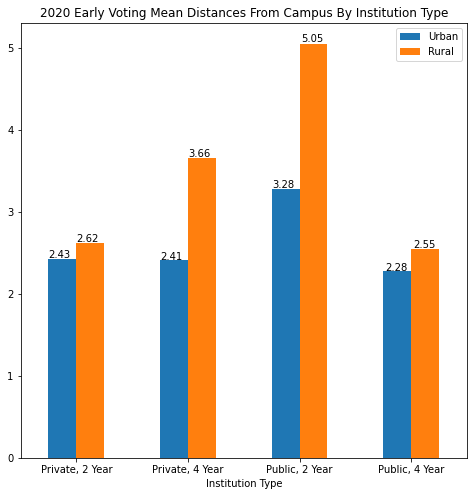

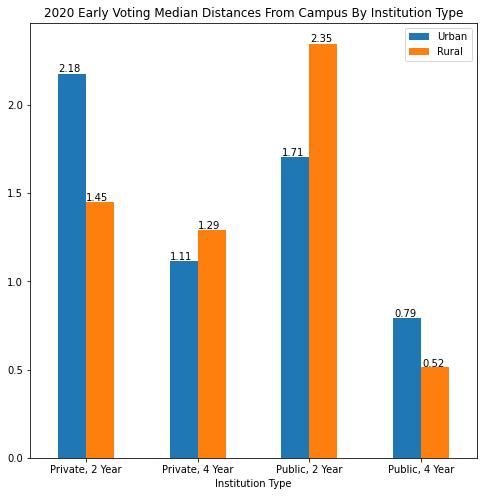

In [40]:
dfu = data[data['urb_rur'] == 'URBAN'][["distances_2020_early","Institution Type"]].groupby('Institution Type').mean()/1609
dfr = data[data['urb_rur'] == 'RURAL'][["distances_2020_early","Institution Type"]].groupby('Institution Type').mean()/1609
df = pd.merge(dfu,dfr, on='Institution Type')
df.columns = ['Urban','Rural']
ax = df.plot.bar(title='2020 Early Voting Mean Distances From Campus By Institution Type',figsize=(8,8),rot=0)
for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

dfu = data[data['urb_rur'] == 'URBAN'][["distances_2020_early","Institution Type"]].groupby('Institution Type').median()/1609
dfr = data[data['urb_rur'] == 'RURAL'][["distances_2020_early","Institution Type"]].groupby('Institution Type').median()/1609
df = pd.merge(dfu,dfr, on='Institution Type')
df.columns = ['Urban','Rural']
ax2 = df.plot.bar(title='2020 Early Voting Median Distances From Campus By Institution Type',figsize=(8,8),rot=0)
for p in ax2.patches:
    ax2.annotate(str(np.round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

In [41]:
#Look at non-public 4-year

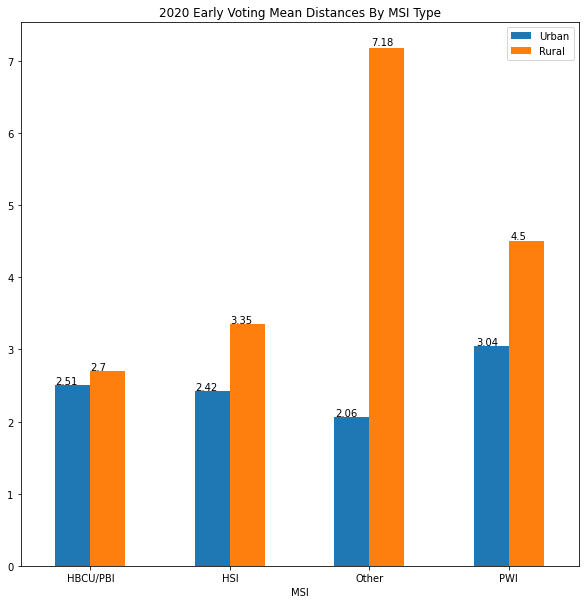

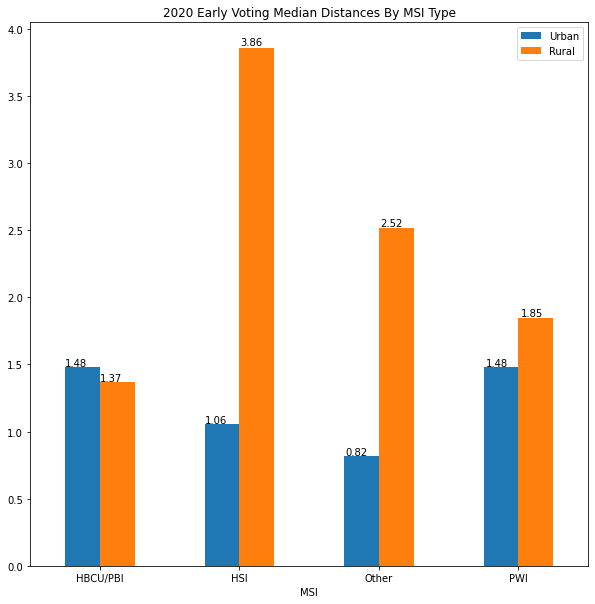

In [42]:
data2 = data[(data['Institution Type'] != 'Public, 4 Year')]
dfu = data2[data2['urb_rur'] == 'URBAN'][["distances_2020_early","MSI"]].groupby('MSI').mean()/1609
dfr = data2[data2['urb_rur'] == 'RURAL'][["distances_2020_early","MSI"]].groupby('MSI').mean()/1609
df = pd.merge(dfu,dfr, on='MSI')
df.columns = ['Urban','Rural']
ax = df.plot.bar(title='2020 Early Voting Mean Distances By MSI Type',figsize=(10,10),rot=0)
for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

dfu = data2[data2['urb_rur'] == 'URBAN'][["distances_2020_early","MSI"]].groupby('MSI').median()/1609
dfr = data2[data2['urb_rur'] == 'RURAL'][["distances_2020_early","MSI"]].groupby('MSI').median()/1609
df = pd.merge(dfu,dfr, on='MSI')
df.columns = ['Urban','Rural']
ax2 = df.plot.bar(title='2020 Early Voting Median Distances By MSI Type',figsize=(10,10),rot=0)
for p in ax2.patches:
    ax2.annotate(str(np.round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

In [67]:
# Percentage of on Campus Polling places by MSI Type

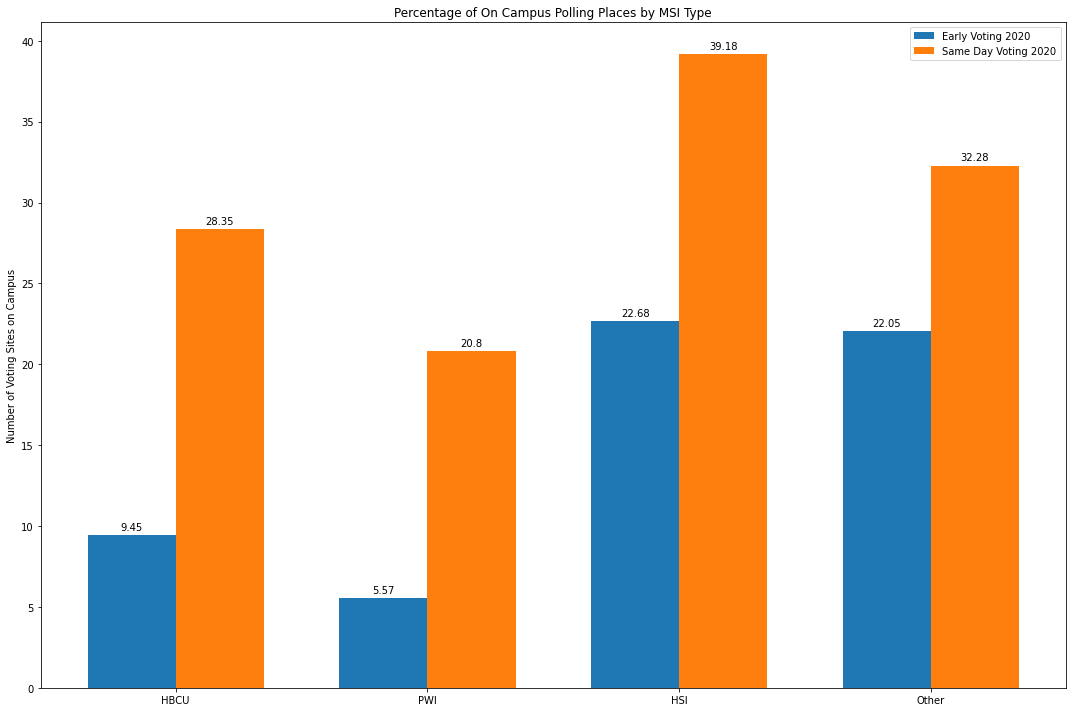

In [66]:
msi_type = ['HBCU', 'PWI', 'HSI', 'Other']


early_election = [len(data_hbcu[data_hbcu["distances_2020_early"] == 0]) / (len(data_hbcu)) * 100,
                  len(data_pwi[data_pwi["distances_2020_early"] == 0]) / (len(data_pwi)) * 100,
                  len(data_hsi[data_hsi["distances_2020_early"] == 0]) / (len(data_hsi)) * 100,
                  len(data_other[data_other["distances_2020_early"] == 0]) / (len(data_other)) * 100
                 ]

election_day = [len(data_hbcu[data_hbcu["distances_2020"] == 0]) / (len(data_hbcu)) * 100,
                  len(data_pwi[data_pwi["distances_2020"] == 0]) / (len(data_pwi)) * 100,
                  len(data_hsi[data_hsi["distances_2020"] == 0]) / (len(data_hsi)) * 100,
                  len(data_other[data_other["distances_2020"] == 0]) / (len(data_other)) * 100
                 ]

early_election = [round(num, 2) for num in early_election]
election_day = [round(num, 2) for num in election_day]


x = np.arange(len(msi_type))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (15,10))
rects1 = ax.bar(x - width/2, early_election, width, label= 'Early Voting 2020')
rects2 = ax.bar(x + width/2, election_day, width, label= 'Same Day Voting 2020')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Voting Sites on Campus')
ax.set_title('Percentage of On Campus Polling Places by MSI Type')
ax.set_xticks(ticks = x , labels= msi_type)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [68]:
# !pip install matplotlib==3.5

In [46]:
# import matplotlib
# matplotlib.__version__

'3.5.0'